In [75]:
import warnings
warnings.filterwarnings("ignore")

In [76]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

##### Read Application Data

In [77]:
Bank_AppData_DF= pd.read_csv('../Resources/CSV/application_data.csv')

In [78]:
# Shape of Application Data
Bank_AppData_DF.shape

(307511, 122)

##### Get Information Application Data

In [79]:
# Getting information about the data type of columns and their count
Bank_AppData_DF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [80]:
# Details of Numerical and Categorical data

#numericalTypeColumns---> holds list of columns that are Numerical
#categorialTypeColumns---> holds list of columns that are Categorical

numericalTypeColumns= Bank_AppData_DF.select_dtypes(include=np.number).columns.tolist()
categorialTypeColumns= Bank_AppData_DF.select_dtypes(include=np.object).columns.tolist()
print(f"Numerical: {len(numericalTypeColumns)} \n{numericalTypeColumns}\n\nCategorical: {len(categorialTypeColumns)}\n{categorialTypeColumns}")

Numerical: 106 
['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATAT

##### Application Data Cleanup

In [81]:
nullCount=Bank_AppData_DF.isnull().sum()

In [82]:

percentageOfNull= round((nullCount/Bank_AppData_DF.shape[0])*(100),2)
percentageOfNull

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [83]:
#totalColHavingNull---> number of columns having null values
totalColHavingNull=len(Bank_AppData_DF.columns[Bank_AppData_DF.isnull().sum()>0])

In [84]:
# for better understanding the null count and its percentage, creating a separate data frame
nullInfoDataFrame= pd.DataFrame({'Columns':Bank_AppData_DF.columns ,'NullCount':nullCount,'Null %':percentageOfNull})
nullInfoDataFrame

,Columns,NullCount,Null %
SK_ID_CURR,SK_ID_CURR,0,0.0
TARGET,TARGET,0,0.0
NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE,0,0.0
CODE_GENDER,CODE_GENDER,0,0.0
FLAG_OWN_CAR,FLAG_OWN_CAR,0,0.0
...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5


In [85]:
# fixed the index, as it was showing the columns again
nullInfoDataFrame.reset_index(drop=True,inplace=True)
nullInfoDataFrame

,Columns,NullCount,Null %
0,SK_ID_CURR,0,0.0
1,TARGET,0,0.0
2,NAME_CONTRACT_TYPE,0,0.0
3,CODE_GENDER,0,0.0
4,FLAG_OWN_CAR,0,0.0
...,...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
118,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
119,AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
120,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5


In [86]:
# max(percentage of null values)
max(nullInfoDataFrame['Null %'])

69.87

###### Setting Threshold for dropping columns which are having percentage of nulls greater than threshold

In [87]:
# max percentage of null value is around 70%, so we can set our threshold to 40% for deleting the null values
Threshold= 40

In [88]:
# list of columsn to be deleted that are haivng null percentage greater than threshold
deleteColumns= nullInfoDataFrame[nullInfoDataFrame['Null %']>Threshold]['Columns'].tolist()
len(deleteColumns)

49

In [89]:
# deleting the columns which with respect to threshold
Bank_AppData_DF.drop(columns=deleteColumns,inplace=True)

In [90]:
Bank_AppData_DF.shape

(307511, 73)

In [91]:
# Finding out data with null percentage less than threshold
nullInfoDfLessThanThreshold= nullInfoDataFrame[nullInfoDataFrame['Null %']<Threshold]

In [92]:
nullInfoDfLessThanThreshold.sort_values(ascending=False, by='Null %')

,Columns,NullCount,Null %
28,OCCUPATION_TYPE,96391,31.35
43,EXT_SOURCE_3,60965,19.83
121,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.50
120,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.50
119,AMT_REQ_CREDIT_BUREAU_MON,41519,13.50
...,...,...,...
33,HOUR_APPR_PROCESS_START,0,0.00
34,REG_REGION_NOT_LIVE_REGION,0,0.00
35,REG_REGION_NOT_WORK_REGION,0,0.00
36,LIVE_REGION_NOT_WORK_REGION,0,0.00


### Dealing with the columns having null Values/Percentage, in decreasing order

##### 1. OCCUPATION_TYPE ---- 31.35% null values

In [93]:
# finding out if OCCUPATION_TYPE' is categorical or numerical
OCCUPATION_TYPE_Type= 'Categorical' if 'OCCUPATION_TYPE' in categorialTypeColumns else 'Numerical'
OCCUPATION_TYPE_Type

'Categorical'

In [94]:
Bank_AppData_DF['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

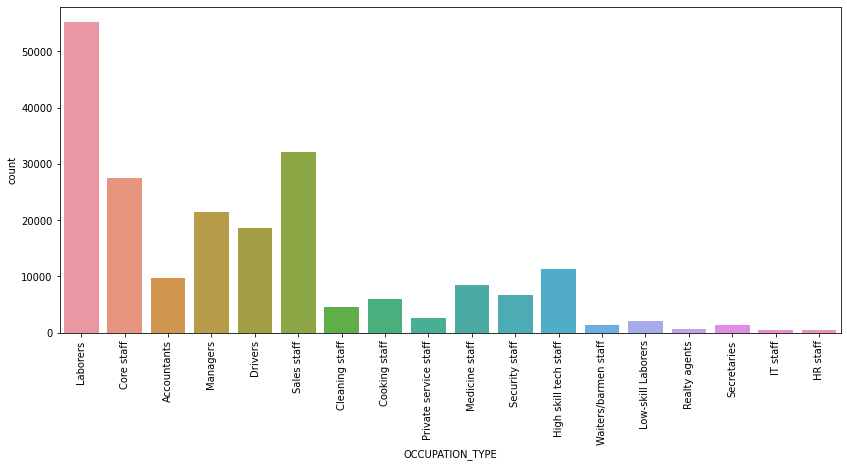

In [95]:
plt.figure(figsize=(14,6))
sns.countplot(data=Bank_AppData_DF,x='OCCUPATION_TYPE')
plt.xticks(rotation =90)
plt.show()

Comment: 
Out of all other Occupation Type, Labours are the highest loan applicants.
Our null percentage for Occupation Type is qutie high, so cant perform data imputation


##### 2. EXT_SOURCE_3 ---- 19.83% null values

In [96]:
# Check if EXT_SOURCE_3 categorical or numerical
EXT_SOURCE_3_Type ='Categorical' if 'EXT_SOURCE_3' in categorialTypeColumns else 'Numerical'
EXT_SOURCE_3_Type

'Numerical'

In [97]:
Bank_AppData_DF['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

<AxesSubplot:xlabel='EXT_SOURCE_3'>

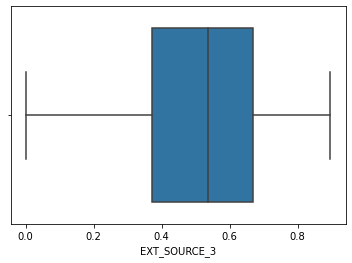

In [98]:
sns.boxplot(data=Bank_AppData_DF, x='EXT_SOURCE_3',orient='v')

- Comment: 

    * No outliers
    * Null percentage is also high, so we can avoid performing imputation for EXT_SOURCE_3.

##### 3. Columns With ---- 13.00% null values

- Columns
    * AMT_REQ_CREDIT_BUREAU_HOUR
    * AMT_REQ_CREDIT_BUREAU_DAY
    * AMT_REQ_CREDIT_BUREAU_WEEK
    * AMT_REQ_CREDIT_BUREAU_MON
    * AMT_REQ_CREDIT_BUREAU_QRT
    * AMT_REQ_CREDIT_BUREAU_YEAR

In [99]:
# Still null percentage is high for below columns, so we are not going to impute the data.
Bank_AppData_DF[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [100]:
"""EXT_SOURCE_2,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE
These columns are having null percentage between 0 and 1. So imputation of data is possible."""

nullInfoDfLessThanOnePercent= nullInfoDataFrame[(nullInfoDataFrame['Null %']>0) & (nullInfoDataFrame['Null %']<1)]
nullInfoDfLessThanOnePercent.sort_values(by='Null %', ascending=False)

,Columns,NullCount,Null %
11,NAME_TYPE_SUITE,1292,0.42
91,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.33
92,DEF_30_CNT_SOCIAL_CIRCLE,1021,0.33
93,OBS_60_CNT_SOCIAL_CIRCLE,1021,0.33
94,DEF_60_CNT_SOCIAL_CIRCLE,1021,0.33
42,EXT_SOURCE_2,660,0.21
10,AMT_GOODS_PRICE,278,0.09


In [101]:
# Checking the type of Variable ---- Numerical or Categorical. Accordingly visualizations can be used

col_Min_Null_Percentage= nullInfoDfLessThanOnePercent.sort_values(by='Null %', ascending=False)['Columns'].tolist()

for i in col_Min_Null_Percentage:
    if i in categorialTypeColumns:
        print(i,':','Categorical')
    else:
        print(i,':','Numerical')


NAME_TYPE_SUITE : Categorical
OBS_30_CNT_SOCIAL_CIRCLE : Numerical
DEF_30_CNT_SOCIAL_CIRCLE : Numerical
OBS_60_CNT_SOCIAL_CIRCLE : Numerical
DEF_60_CNT_SOCIAL_CIRCLE : Numerical
EXT_SOURCE_2 : Numerical
AMT_GOODS_PRICE : Numerical


#### 4. Analysis for NAME_TYPE_SUITE

In [102]:
# checking values of Name type suite
Bank_AppData_DF['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

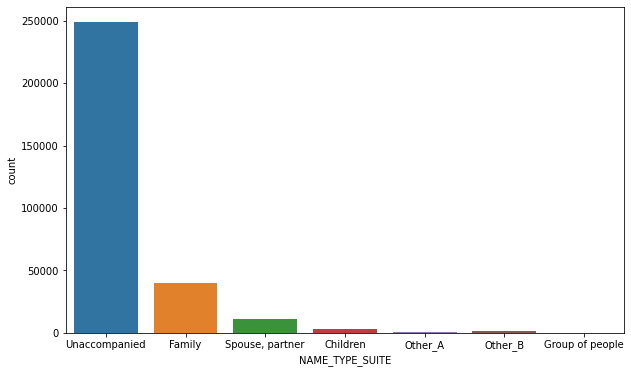

In [103]:
#Visualizing the above value count using count plot.
plt.figure(figsize=(10,6))
sns.countplot(Bank_AppData_DF['NAME_TYPE_SUITE'])
plt.show()

**From above count plot:**
1. Unaccompanied are the max number of people who can act as a guaranteer for loan application.
2. Family, Spouse,Partner and Children are the least favourable choices as an guaranteer.


#### 5. Analysis for OBS_30_CNT_SOCIAL_CIRCLE

In [104]:
Bank_AppData_DF['OBS_30_CNT_SOCIAL_CIRCLE'].describe()
# here we can see that the min is 0.0 and max 75% is 2.0 but max is 348. So we need to check for outliers using the box plot


count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

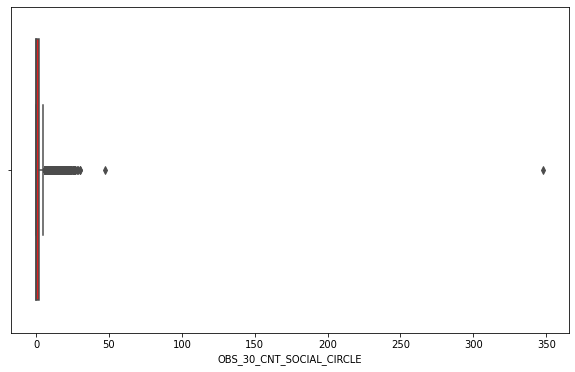

In [105]:
plt.figure(figsize=(10,6))
sns.boxplot(Bank_AppData_DF['OBS_30_CNT_SOCIAL_CIRCLE'],color='red')
plt.show()

In [106]:
print('OBS_30_CNT_SOCIAL_CIRCLE -- Mean :', Bank_AppData_DF['OBS_30_CNT_SOCIAL_CIRCLE'].mean())
print('OBS_30_CNT_SOCIAL_CIRCLE -- Mode :',Bank_AppData_DF['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0])


OBS_30_CNT_SOCIAL_CIRCLE -- Mean : 1.4222454239942575
OBS_30_CNT_SOCIAL_CIRCLE -- Mode : 0.0


- Comments
    * OBS_30_CNT_SOCIAL_CIRCLE box plot is showing 2 outlier. 
    * one is at 50 and other one at 350.
    * This column has null percentage 0.33%. 
    * We can perform imputation on this column. 
    * We can use either mean or mode for the same.


#### 6. Analysis for DEF_30_CNT_SOCIAL_CIRCLE

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64 

Mode : 0.0 



<AxesSubplot:xlabel='DEF_30_CNT_SOCIAL_CIRCLE'>

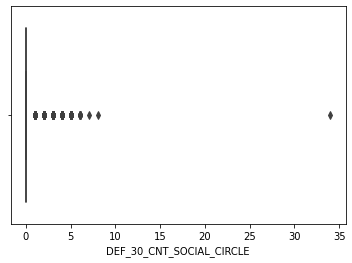

In [107]:
# identify if there are any outliers using boxplot
print(Bank_AppData_DF['DEF_30_CNT_SOCIAL_CIRCLE'].describe(),'\n')
print('Mode :',Bank_AppData_DF['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0],'\n')
sns.boxplot(Bank_AppData_DF['DEF_30_CNT_SOCIAL_CIRCLE']) 


- Comments:
    * mean 0.143421
    * mode 0.0
    * Null percentage is between 0 and 1, we can consider this column for imputation. 

#### 7. Analysis for OBS_60_CNT_SOCIAL_CIRCLE

0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
26.0          1
27.0          5
28.0          1
29.0          2
30.0          1
47.0          1
344.0         1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

Description:
count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

Mode :  0.0



<AxesSubplot:xlabel='OBS_60_CNT_SOCIAL_CIRCLE'>

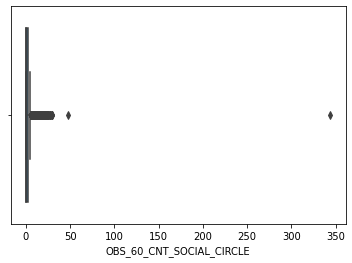

In [108]:
# check values
print(Bank_AppData_DF['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index())
print()
# describe
print('Description:')
print(Bank_AppData_DF['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

print('\nMode : ',Bank_AppData_DF['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0])

print()
sns.boxplot(Bank_AppData_DF['OBS_60_CNT_SOCIAL_CIRCLE'])

- Comments
    * There are outliers at 50 and 350
    * mean 1.405292
    * Mode :  0.0
    * Null percentage is between 0 and 1, we can consider this column for imputation.

#### 8. Analysis for DEF_60_CNT_SOCIAL_CIRCLE

VALUE COUNTS:
0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

DESCRIPTION:
count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

MODE: 0.0


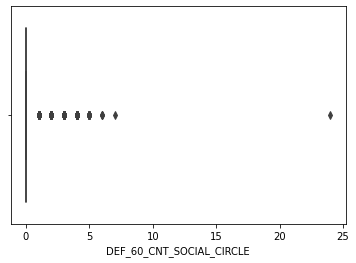

In [109]:
#getting details of values
print('VALUE COUNTS:')
print(Bank_AppData_DF['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index())

print('\nDESCRIPTION:')
print(Bank_AppData_DF['DEF_60_CNT_SOCIAL_CIRCLE'].describe())

# retrieve mode
print('\nMODE:',Bank_AppData_DF['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0])

#plotting box plot
sns.boxplot(Bank_AppData_DF['DEF_60_CNT_SOCIAL_CIRCLE'])
plt.show()

- Comments:
    * outliers are at 7.5 and 24
    * mean is 0.100049 and mode is 0.0
    * Null percentage is between 0 and 1, we can consider this column for imputation.

#### 9. Analysis for EXT_SOURCE_2

VALUE COUNTS:
8.173617e-08     1
1.315956e-06     1
5.002109e-06     1
5.600338e-06     1
5.939651e-06     1
                ..
8.206095e-01     1
8.206159e-01     1
8.213936e-01     1
8.217142e-01     1
8.549997e-01    26
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

DESCRIPTION:
count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

MEDIAN: 0.5659614260608526

MODE: 0.2858978721410488


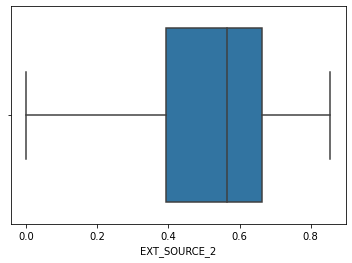

In [110]:
print('VALUE COUNTS:')
print(Bank_AppData_DF['EXT_SOURCE_2'].value_counts().sort_index())



print('\nDESCRIPTION:')
print(Bank_AppData_DF['EXT_SOURCE_2'].describe())

# retrieve median
print('\nMEDIAN:',Bank_AppData_DF['EXT_SOURCE_2'].median())

# retrieve mode
print('\nMODE:',Bank_AppData_DF['EXT_SOURCE_2'].mode()[0])

#plotting box plot
sns.boxplot(Bank_AppData_DF['EXT_SOURCE_2'])
plt.show()

- Comments:
    * No Outliers
    * mean : 5.143927e-01, mode : 0.2858978721410488, median : 0.5659614260608526
    * Null percentage is between 0 and 1, we can consider this column for imputation.

#### 10. Analysis for AMT_GOODS_PRICE

VALUE COUNTS:
40500.0         1
45000.0      1169
49500.0       157
50751.0         1
54000.0       290
             ... 
3555000.0       1
3600000.0       3
3712500.0       1
3825000.0       1
4050000.0       8
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

DESCRIPTION:
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

MEDIAN: 450000.0

MODE: 450000.0


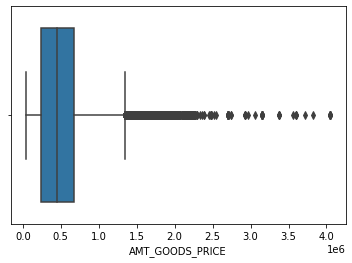

In [111]:
print('VALUE COUNTS:')
print(Bank_AppData_DF['AMT_GOODS_PRICE'].value_counts().sort_index())

print('\nDESCRIPTION:')
print(Bank_AppData_DF['AMT_GOODS_PRICE'].describe())

# retrieve median
print('\nMEDIAN:',Bank_AppData_DF['AMT_GOODS_PRICE'].median())

# retrieve mode
print('\nMODE:',Bank_AppData_DF['AMT_GOODS_PRICE'].mode()[0])

#plotting box plot
sns.boxplot(Bank_AppData_DF['AMT_GOODS_PRICE'])
plt.show()

- Comments:
    * AMT_GOODS_PRICE---->(Product Price)For consumer loans it is the price of the goods for which the loan  is given. So if we have outlier then it could be valid value of this column.
    * mean : 5.383962e+05, mode=450000.0, median=450000.0

In [112]:
# check columns for data issue

for column in Bank_AppData_DF.columns.tolist():
    print(column,':',Bank_AppData_DF[column].unique())

SK_ID_CURR : [100002 100003 100004 ... 456253 456254 456255]
TARGET : [1 0]
NAME_CONTRACT_TYPE : ['Cash loans' 'Revolving loans']
CODE_GENDER : ['M' 'F' 'XNA']
FLAG_OWN_CAR : ['N' 'Y']
FLAG_OWN_REALTY : ['Y' 'N']
CNT_CHILDREN : [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
AMT_INCOME_TOTAL : [202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
AMT_CREDIT : [ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
AMT_ANNUITY : [24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
AMT_GOODS_PRICE : [ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]
NAME_TYPE_SUITE : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE : ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE : ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS : ['Singl

### Analysing Issues With Data

1. CODE_GENDER : ['M' 'F' 'XNA']

In [113]:
# replacing the XNA with the most common value in CODE_GENDER
Bank_AppData_DF['CODE_GENDER'].replace('XNA',Bank_AppData_DF['CODE_GENDER'].mode()[0],inplace=True)

In [114]:
Bank_AppData_DF['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

2. DAYS_BIRTH : [ -9461 -16765 -19046...... ]

In [115]:
Bank_AppData_DF['YEARS_BIRTH']=Bank_AppData_DF['DAYS_BIRTH'].apply(lambda x: round(abs(x)/365))

In [116]:
Bank_AppData_DF['YEARS_BIRTH']

0         26
1         46
2         52
3         52
4         55
          ..
307506    26
307507    57
307508    41
307509    33
307510    46
Name: YEARS_BIRTH, Length: 307511, dtype: int64

3. NAME_FAMILY_STATUS : ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated' 'Unknown']

In [117]:
Bank_AppData_DF['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100

Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Unknown                  0.000650
Name: NAME_FAMILY_STATUS, dtype: float64

In [118]:
# replacing Unknown with the most common value i.e Married
Bank_AppData_DF['NAME_FAMILY_STATUS'].replace('Unknown',Bank_AppData_DF['NAME_FAMILY_STATUS'].mode()[0],inplace=True)

In [119]:
Bank_AppData_DF['NAME_FAMILY_STATUS'].value_counts()

Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

- Comments:
    * Maaried category seems to be a good fit for imputation.

4. DAYS_EMPLOYED
    - indicates How many days before the application the person started current employment     
    - DAYS_EMPLOYED : [  -637  -1188   -225 ... -12971 -11084  -8694]


In [120]:
Bank_AppData_DF['DAYS_EMPLOYED'].unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694], dtype=int64)

In [121]:

Bank_AppData_DF['DAYS_EMPLOYED']=Bank_AppData_DF['DAYS_EMPLOYED'].apply(lambda x: abs(x) if x<0 else x)

In [122]:
Bank_AppData_DF['DAYS_EMPLOYED'].value_counts().head()

365243    55374
200         156
224         152
230         151
199         151
Name: DAYS_EMPLOYED, dtype: int64

- comments:
    * there are around 55 thousand people who are working from a long time.

In [123]:
Bank_AppData_DF[Bank_AppData_DF['DAYS_EMPLOYED']==365243]['NAME_INCOME_TYPE'].unique()

array(['Pensioner', 'Unemployed'], dtype=object)

In [124]:
# Analysing years of working/experience will be easy as compare to days
Bank_AppData_DF['YEARS_EMPLOYED']= Bank_AppData_DF['DAYS_EMPLOYED'].apply(lambda x: round(x/365))

In [125]:
Bank_AppData_DF['YEARS_EMPLOYED'].head()

0    2
1    3
2    1
3    8
4    8
Name: YEARS_EMPLOYED, dtype: int64

5. DAYS_REGISTRATION
    - How many days before the application did client change his registration
    - DAYS_REGISTRATION: [ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]

In [126]:
Bank_AppData_DF['DAYS_REGISTRATION'].value_counts().sort_index(ascending=False)

 0.0         80
-1.0        113
-2.0         92
-3.0         84
-4.0         92
           ... 
-22858.0      1
-22928.0      1
-23416.0      1
-23738.0      1
-24672.0      1
Name: DAYS_REGISTRATION, Length: 15688, dtype: int64

In [127]:
Bank_AppData_DF['DAYS_REGISTRATION']=Bank_AppData_DF['DAYS_REGISTRATION'].apply(lambda x: abs(x) if x<0 else x)

In [128]:
Bank_AppData_DF['DAYS_REGISTRATION'].describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

<AxesSubplot:xlabel='DAYS_REGISTRATION'>

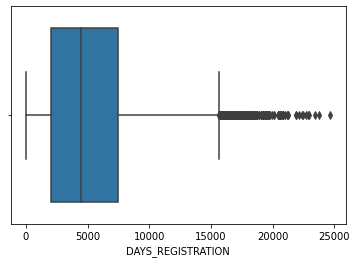

In [129]:
sns.boxplot(Bank_AppData_DF['DAYS_REGISTRATION'])

In [130]:
 Bank_AppData_DF['YEARS_REGISTRATION']=Bank_AppData_DF['DAYS_REGISTRATION'].apply(lambda x: round(x/365) )

In [131]:
Bank_AppData_DF['YEARS_REGISTRATION']

0         10
1          3
2         12
3         27
4         12
          ..
307506    23
307507    12
307508    18
307509     7
307510    14
Name: YEARS_REGISTRATION, Length: 307511, dtype: int64

6. DAYS_ID_PUBLISH
    - How many days before the application did client change the identity document with which he applied for the loan
    - DAYS_ID_PUBLISH : [-2120  -291 -2531 ... -6194 -5854 -6211]

In [132]:
Bank_AppData_DF['DAYS_ID_PUBLISH'].unique()

array([-2120,  -291, -2531, ..., -6194, -5854, -6211], dtype=int64)

In [133]:
Bank_AppData_DF['DAYS_ID_PUBLISH']=Bank_AppData_DF['DAYS_ID_PUBLISH'].apply(lambda x: abs(x) if x<0 else x)

In [134]:
Bank_AppData_DF['YEARS_ID_PUBLISH']=Bank_AppData_DF['DAYS_ID_PUBLISH'].apply(lambda x: round(x/365))

7. DAYS_LAST_PHONE_CHANGE
    - DAYS_LAST_PHONE_CHANGE : [-1134.  -828.  -815. ... -3988. -3899. -3538.]
    - How many days before application did client change phone

In [135]:
Bank_AppData_DF['DAYS_LAST_PHONE_CHANGE'].value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-4051.0        1
-3593.0        1
-3622.0        1
-3570.0        1
-3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [136]:
Bank_AppData_DF['DAYS_LAST_PHONE_CHANGE']=Bank_AppData_DF['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: abs(x) if x<0 else x)

In [137]:
Bank_AppData_DF['DAYS_LAST_PHONE_CHANGE'].dtype

dtype('float64')

In [138]:
Bank_AppData_DF['YEARS_LAST_PHONE_CHANGE']=Bank_AppData_DF['DAYS_LAST_PHONE_CHANGE'].apply(lambda x:x if np.isnan(x) else round(x/365),0)

In [139]:
Bank_AppData_DF['YEARS_LAST_PHONE_CHANGE'].unique()

array([3, 2, 7, 4, 0, 5, 6, 1, 8, 9, 11, 10, nan, 12], dtype=object)

## Helper Functions

##### we are calculating the IQR to find the outliers in multiple places. So instead of writing the same code multiple times, I am creating a function for the same.

1. Calcualte IQR

In [140]:

def calcIQR(IQR_func_df,colName):
    
    Q1= IQR_func_df[colName].quantile(0.25)
    Q3= IQR_func_df[colName].quantile(0.75)
    
    IQR= Q3-Q1
    outliers={}
    outliers['MinOutlierThreshold']=Q1- 1.5*IQR
    outliers['MaxOutlierThreshold']=Q3+1.5*IQR
    
    return outliers
    

## Working with Numerical Data

In [141]:
numericalTypeColumns= Bank_AppData_DF.select_dtypes(include=np.number).columns.tolist()
numericalTypeColumns

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMEN

1. CNT_CHILDREN
    - CNT_CHILDREN : [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
    - Number of children the client has

In [142]:
Bank_AppData_DF['CNT_CHILDREN'].value_counts(normalize=True).sort_index()*100

0     70.036844
1     19.875387
2      8.698551
3      1.208737
4      0.139507
5      0.027316
6      0.006829
7      0.002276
8      0.000650
9      0.000650
10     0.000650
11     0.000325
12     0.000650
14     0.000976
19     0.000650
Name: CNT_CHILDREN, dtype: float64

{'MinOutlierThreshold': -1.5, 'MaxOutlierThreshold': 2.5} 
 values before MinOutlierThreshold and after MaxOutlierThreshold are outliers


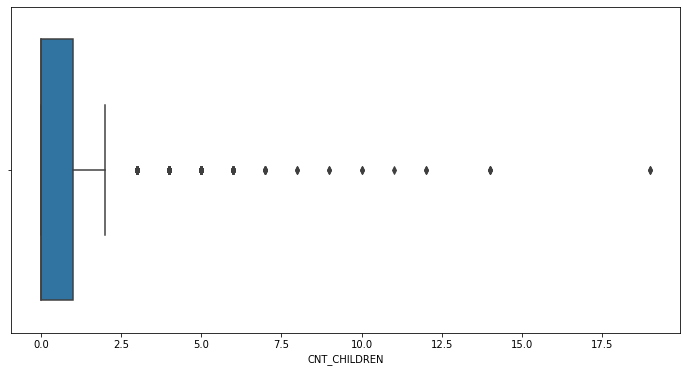

In [143]:

print(calcIQR(Bank_AppData_DF,'CNT_CHILDREN'),'\n','values before MinOutlierThreshold and after MaxOutlierThreshold are outliers')

plt.figure(figsize=(12,6))
sns.boxplot(Bank_AppData_DF['CNT_CHILDREN'])
plt.show()


- Comments:
    * applicants who are having 3 or more children are outliers here

2. AMT_INCOME_TOTAL
    - AMT_INCOME_TOTAL : [202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
    - Income of the client

In [157]:
temp=Bank_AppData_DF['AMT_INCOME_TOTAL'].value_counts(normalize=True)*100
Bank_AppData_DF['AMT_INCOME_TOTAL'].describe(percentiles=[0.75,0.99,0.999])
# print(calcIQR(Bank_AppData_DF,'AMT_INCOME_TOTAL'))


count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
50%      1.471500e+05
75%      2.025000e+05
99%      4.725000e+05
99.9%    9.000000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

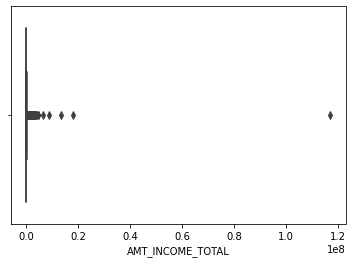

In [162]:
sns.boxplot(Bank_AppData_DF['AMT_INCOME_TOTAL'])

not able to identify anyhing from above chart. Need to consider the values with respect to the 99.9 percentile. i.e 90k

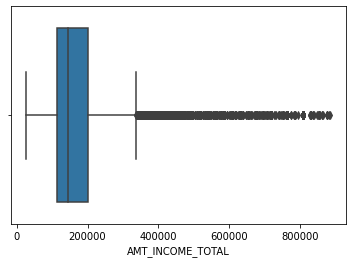

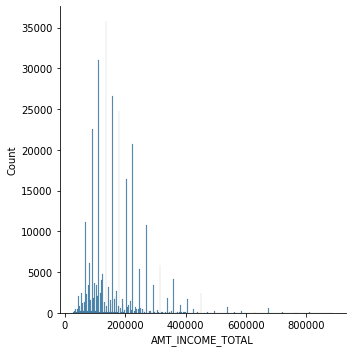

In [161]:
sns.boxplot(Bank_AppData_DF.AMT_INCOME_TOTAL[Bank_AppData_DF['AMT_INCOME_TOTAL']<900000])
sns.displot(Bank_AppData_DF.AMT_INCOME_TOTAL[Bank_AppData_DF['AMT_INCOME_TOTAL']<900000])

- comments:
    * people who are having income/salaries more than 90k are outliers
    

3. CNT_FAM_MEMBERS
    - CNT_FAM_MEMBERS : [ 1.  2.  3.  4.  5.  6.  9.  7.  8. 10. 13. nan 14. 12. 20. 15. 16. 11.]
    - How many family members does client have


In [166]:
Bank_AppData_DF['CNT_FAM_MEMBERS'].describe(percentiles=[0.75,0.99,0.999])
# Bank_AppData_DF['CNT_FAM_MEMBERS'].unique()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
50%           2.000000
75%           3.000000
99%           5.000000
99.9%         6.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

<AxesSubplot:xlabel='CNT_FAM_MEMBERS'>

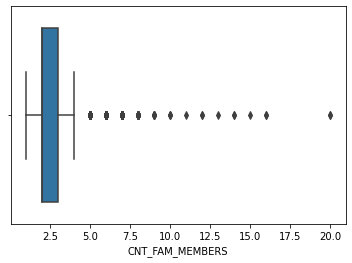

In [167]:
sns.boxplot(Bank_AppData_DF['CNT_FAM_MEMBERS'])

- comments:
    * we can see that people who are having 5 or more family members are outliers

4. AMT_ANNUITY
    - AMT_ANNUITY : [24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
    - Loan annuity (EMI Ammount)

In [168]:
Bank_AppData_DF['AMT_ANNUITY'].describe(percentiles=[0.75,0.99,0.999])

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
50%       24903.000000
75%       34596.000000
99%       70006.500000
99.9%    110047.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

<AxesSubplot:xlabel='AMT_ANNUITY'>

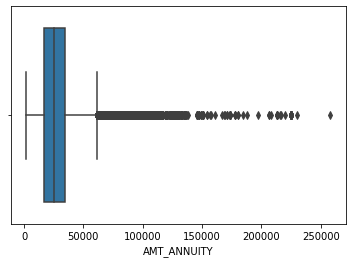

In [169]:
sns.boxplot(Bank_AppData_DF['AMT_ANNUITY'])

from above boxplot, i am not able to understand the outliers. To get more insight, i am calling the prefdefine helper function which will give me the details for outliers

In [172]:
print(calcIQR(Bank_AppData_DF,'AMT_ANNUITY'))

{'MinOutlierThreshold': -10584.0, 'MaxOutlierThreshold': 61704.0}


- Comments:
    * the values before -10584.0 and after 61704.0 are outliers

5. AMT_CREDIT
    - AMT_CREDIT : [ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
    - Credit amount of the loan

In [173]:
Bank_AppData_DF['AMT_CREDIT'].describe(percentiles=[0.75,0.99,0.999])

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
50%      5.135310e+05
75%      8.086500e+05
99%      1.854000e+06
99.9%    2.517300e+06
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

<AxesSubplot:xlabel='AMT_CREDIT'>

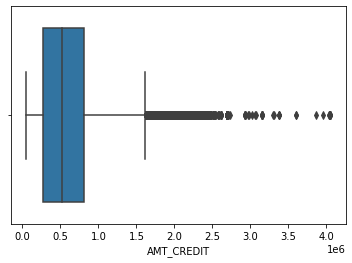

In [174]:
sns.boxplot(Bank_AppData_DF['AMT_CREDIT'])

In [176]:
calcIQR(Bank_AppData_DF,'AMT_CREDIT')

{'MinOutlierThreshold': -537975.0, 'MaxOutlierThreshold': 1616625.0}

- Comments:
    * the values before -537975.0 and after 1616625.0 are outliers

6. DAYS_LAST_PHONE_CHANGE
    - DAYS_LAST_PHONE_CHANGE : [-1134.  -828.  -815. ... -3988. -3899. -3538.]
    - How many days before application did client change phone

In [180]:
Bank_AppData_DF['DAYS_LAST_PHONE_CHANGE'].describe(percentiles=[0.75,0.99,0.999])
Bank_AppData_DF['DAYS_LAST_PHONE_CHANGE'].unique()

array([1134.,  828.,  815., ..., 3988., 3899., 3538.])

<AxesSubplot:xlabel='DAYS_LAST_PHONE_CHANGE'>

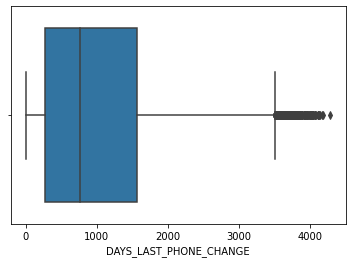

In [178]:
sns.boxplot(Bank_AppData_DF['DAYS_LAST_PHONE_CHANGE'])

In [179]:
calcIQR(Bank_AppData_DF,'DAYS_LAST_PHONE_CHANGE') 

{'MinOutlierThreshold': -1670.0, 'MaxOutlierThreshold': 3514.0}

- Comments:
    * the values before -1670.0 and after 3514.0 are outliers